<a href="https://colab.research.google.com/github/lallen23/lab-2-phase-2-lallen23/blob/main/DATA_301_Lab_2B_Evidence_of_Discrimination%3F_Lillie_Allen%2C_Brenden_Rogers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [1]:
import pandas as pd
data_dir = "http://dlsun.github.io/pods/data/"
df_expenditures = pd.read_csv(data_dir + "ca_dds_expenditures.csv")
df_expenditures.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


Hispanic / White (Non-Hispanic
Hispanic              11065.569149
White not Hispanic    24697.548628
Name: Expenditures, dtype: float64

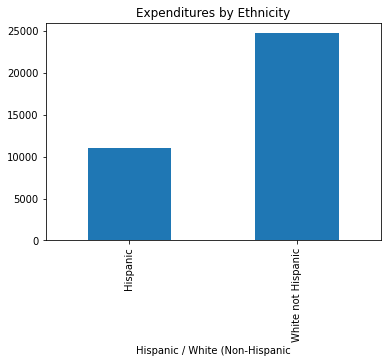

In [2]:
df_expenditures["Hispanic / White (Non-Hispanic"] = df_expenditures["Ethnicity"].map({
    "Hispanic" : "Hispanic",
    "White not Hispanic" : "White not Hispanic"
})
df_expenditures.groupby("Hispanic / White (Non-Hispanic")["Expenditures"].mean().plot.bar(title = "Expenditures by Ethnicity")
df_expenditures.groupby("Hispanic / White (Non-Hispanic")["Expenditures"].mean()

The average expenditures by the DDS on Hispanic residents is less than half of the average expenditures by the DDS on white (non-Hispanic) residents.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

Age Cohort  Hispanic / White (Non-Hispanic
0 to 5      Hispanic                           1393.204545
            White not Hispanic                 1366.900000
13 to 17    Hispanic                           3955.281553
            White not Hispanic                 3904.358209
18 to 21    Hispanic                           9959.846154
            White not Hispanic                10133.057971
22 to 50    Hispanic                          40924.116279
            White not Hispanic                40187.624060
51+         Hispanic                          55585.000000
            White not Hispanic                52670.424242
6 to 12     Hispanic                           2312.186813
            White not Hispanic                 2052.260870
Name: Expenditures, dtype: float64

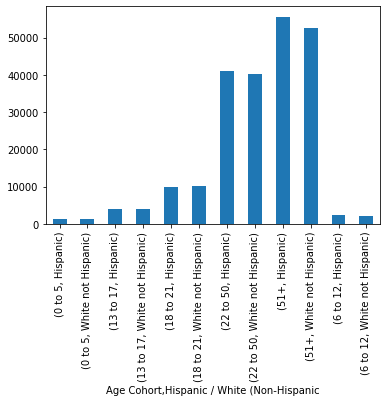

In [3]:
df_expenditures.groupby(["Age Cohort", "Hispanic / White (Non-Hispanic"])["Expenditures"].mean().plot.bar()
df_expenditures.groupby(["Age Cohort", "Hispanic / White (Non-Hispanic"])["Expenditures"].mean()

Contradictory to the results I obtained in Question 1, the average expenditure on Hispanic residents and white (non-Hispanic) residents, within each age cohort is about the same. In fact, within some of each age cohorts like 51+ years, the average expenditure on Hispanic residents is more than white (non-Hispanic) residents.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

Age Cohort,0 to 5,13 to 17,18 to 21,22 to 50,51+,6 to 12
Hispanic / White (Non-Hispanic,,,,,,
Hispanic,44,103,78,43,17,91
White not Hispanic,20,67,69,133,66,46


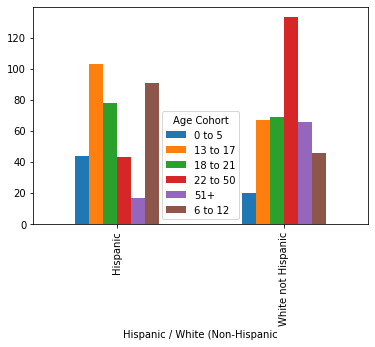

In [4]:
# the distributions of ages of Hispanics and whites
pd.crosstab(df_expenditures["Hispanic / White (Non-Hispanic"], df_expenditures["Age Cohort"]).plot.bar()
pd.crosstab(df_expenditures["Hispanic / White (Non-Hispanic"], df_expenditures["Age Cohort"])

Age Cohort
0 to 5       1415.280488
13 to 17     3922.613208
18 to 21     9888.537688
22 to 50    40209.283186
51+         53521.896226
6 to 12      2226.862857
Name: Expenditures, dtype: float64

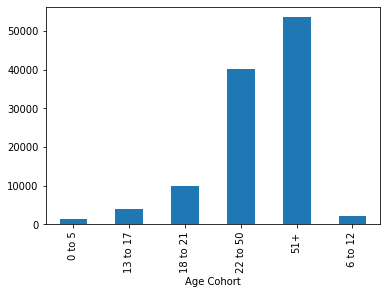

In [5]:
# the average expenditure as a function of age
df_expenditures.groupby("Age Cohort")["Expenditures"].mean().plot.bar()
df_expenditures.groupby("Age Cohort")["Expenditures"].mean()

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


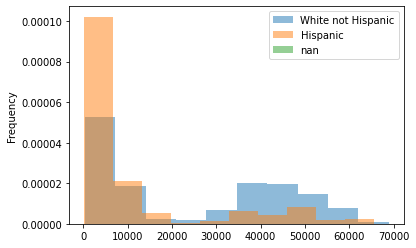

In [6]:
for ethnicity in df_expenditures["Hispanic / White (Non-Hispanic"].unique():
    df_expenditures[df_expenditures["Hispanic / White (Non-Hispanic"] == ethnicity]["Expenditures"].plot.hist(
        label=ethnicity,
        density=True,
        alpha=0.5,
        legend=True
    )

As depicted in visual #2, the average expenditure as a function of age, the 51+ cohort has the highest average spending, while the 0 to 5 cohort has the least average spending. 


As depicted in visual #2, the age cohort 0-5 for Hispanic residents is more than twice as large compared to white non-Hispanic residents. We also see that the age cohort 51+ for white non-Hispanic residents is almost four as large as the same cohort for Hispanic residents.

This likely explains why White recipients recieve more in aggregate, but Hispanics recieve more within each age cohort category.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.